# Jaccard and word2vec matrices

Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as sp

import matrices.loading as mload

In [2]:
plt.rcParams["figure.figsize"] = (16,16)

Dataset (629814 documents)

This is the path to th dataset.

In [3]:
data_path = "resources/aminer/v1" # 629814 documents

Load sparse matrix with jaccard similarities.

In [4]:
matrix_jaccard = mload.load_matrix_jaccard_sim(data_path) # 998 documents sample
print(matrix_jaccard.ndim, matrix_jaccard.shape)

Loading saved matrix ...
2 (998, 998)


Load sparse matrix with word2vec similarities.

In [5]:
matrix_word2vec = mload.load_matrix_word2vec_sim(data_path) # 998 documents sample
print(matrix_word2vec.ndim, matrix_word2vec.shape)

Loading saved matrix ...
2 (998, 998)


In [6]:
N = matrix_jaccard.shape[0]
print("Number of documents", N, (matrix_jaccard.shape))

Number of documents 998 (998, 998)


Dice

In [7]:
matrix_dice = 2*matrix_jaccard/(1 + matrix_jaccard)
print(matrix_dice.shape)

(998, 998)


Jaccard disimilarity

In [8]:
matrix_jaccard_dis = 1 -matrix_jaccard
print(matrix_jaccard_dis.shape)

(998, 998)


In [9]:
# Means of jaccard similarities
jaccard_similarity_mean = np.divide(np.sum(matrix_jaccard, axis=1), N)
# Array of indices to sort matrices  
jaccard_ordered_indices = jaccard_similarity_mean.argsort()[::-1]

In [10]:
# Means of word2vec similarities
word2vec_similarity_mean = np.divide(np.sum(matrix_word2vec, axis=1), N)
# Array of indices to sort matrices  
word2vec_ordered_indices = word2vec_similarity_mean.argsort()[::-1]

In [11]:
# Means of dice similarities
dice_similarity_mean = np.divide(np.sum(matrix_dice, axis=1), N)
# Array of indices to sort matrices  
dice_ordered_indices = dice_similarity_mean.argsort()[::-1]

## Covariance 

In [ ]:
plt.matshow(np.cov(matrix_word2vec[:,word2vec_ordered_indices][word2vec_ordered_indices,:]), cmap='hot', vmin=0, vmax=0.005)
plt.colorbar()

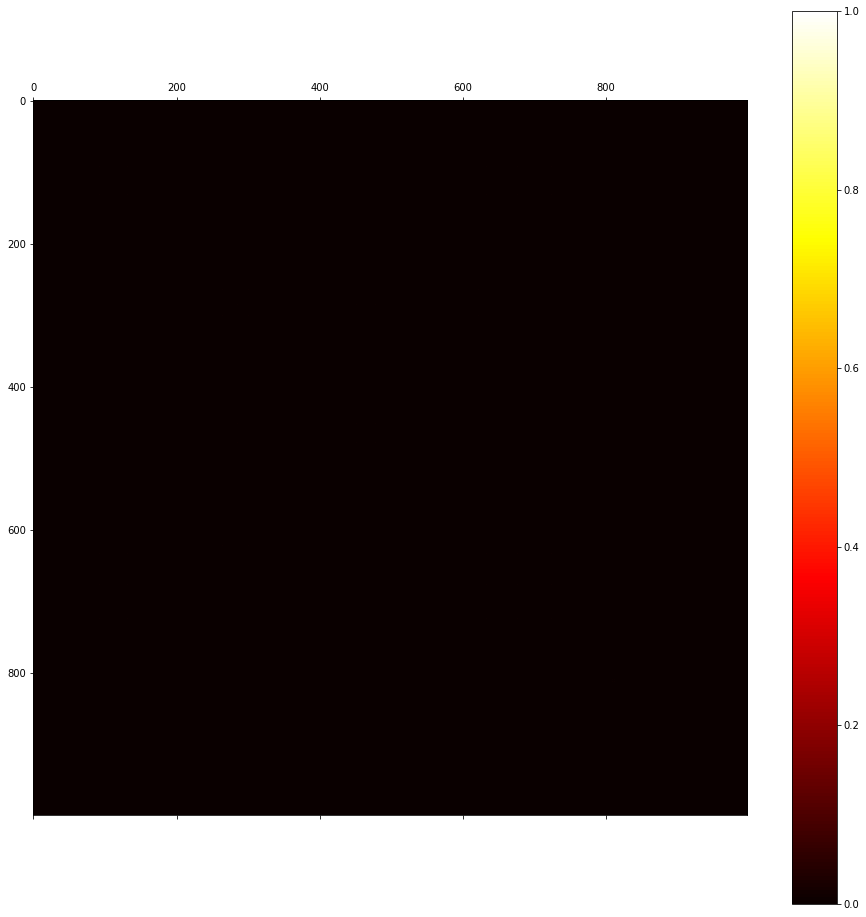

In [18]:
plt.matshow(np.cov(matrix_jaccard), cmap='hot', vmin=0, vmax=1)
plt.colorbar()